# Part 1: Working with Regex

In [55]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
pattern = r"\d{10}"
text_to_search = "Hello my name is sebastien, you can call me on 0664533519. See you!"
re.findall(pattern, text_to_search)

['0664533519']

In [4]:
zip_code_pattern = r"\d{5}"
text_to_search = "I moved to Paris 75011, it's closer to my workplace."
re.findall(zip_code_pattern, text_to_search)

['75011']

In [5]:
pattern = r"date of"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [6]:
pattern = r"\d{4}/\d{2}/\d{2}"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['2019/03/12', '2021/03/01']

In [7]:
date_pattern = r"\d{2}-\d{2}-\d{4}"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(date_pattern, text_to_search)

['15-02-2017']

In [8]:
pattern = r"Receipt Number (\d+)"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern, text_to_search)

['103402']

In [9]:
quantity_pattern = r"Quantity +\d+"

In [14]:
amount_pattern = r"Total Amount +\d+\.\d{2} €"

In [10]:
quantity_group_pattern = r"Quantity +(\d+)"

In [12]:
amount_group_pattern = r"Total Amount +(\d+\.\d{2}) €"

In [15]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-text-extraction-with-regex/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 6 items

test_patterns.py::TestPatterns::test_amount_group_pattern PASSED         [ 16%]
test_patterns.py::TestPatterns::test_amount_pattern PASSED               [ 33%]
test_patterns.py::TestPatterns::test_date_pattern PASSED                 [ 50%]
test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED       [ 66%]
test_patterns.py::TestPatterns::test_quantity_pattern PASSED             [ 83%]
test_patterns.py::TestPatterns::test_zip_code_pattern PASSED             [100%]

============================== 6 passed in 0.04s ===============================


💯 You can commit your code:


# Part 2: From a text file to a DataFrame

In [17]:
filepath = 'data/receipts.txt'
with open(filepath, encoding='utf-8') as f:
    receipts_str = f.read()

In [21]:
print(receipts_str[:500])




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €

************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €

************************************


Receipt Number 103086 ||| 23-01-2017 
-----


In [22]:
receipts_list = receipts_str.split("====================================")
len(receipts_list)

100

In [23]:
receipts_dict = {
    "date": [],
    "quantity": [],
    "amount": []
}

In [24]:
for receipt in receipts_list:
    print(receipt)




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €



************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €



************************************


Receipt Number 103086 ||| 23-01-2017 
------------------------------------

Quantity                         156
Total Amount               2808.00 €



************************************


Receipt Number 103193 ||| 31-01-2017 
------------------------------------

Quantity                         182
Total Amount               4368.00 €



************************************


Receipt Number 103270 ||| 06-02-2017 
------------------------------------

Quantity                          97
Total Amount               1988.50 €



************************************


Receipt Number 103402 ||| 15-02-2017 

In [31]:
for receipt in receipts_list:
    date_pattern = r"\d{2}-\d{2}-\d{4}"
    date = re.findall(date_pattern, receipt)[0]
    amount_pattern = r"Total Amount +(\d+\.\d{2}) €"
    amount = re.findall(amount_pattern, receipt)[0]
    quantity_pattern = r"Quantity +(\d+)"
    quantity = re.findall(quantity_pattern, receipt)[0]
    receipts_dict["date"].append(date)
    receipts_dict["amount"].append(amount)
    receipts_dict["quantity"].append(quantity)

In [32]:
receipts_dict

{'date': ['02-01-2017',
  '05-01-2017',
  '23-01-2017',
  '31-01-2017',
  '06-02-2017',
  '15-02-2017',
  '16-02-2017',
  '17-02-2017',
  '21-02-2017',
  '27-02-2017',
  '28-02-2017',
  '01-03-2017',
  '08-03-2017',
  '09-03-2017',
  '17-03-2017',
  '21-03-2017',
  '21-03-2017',
  '22-03-2017',
  '22-03-2017',
  '27-03-2017',
  '31-03-2017',
  '07-04-2017',
  '11-04-2017',
  '14-04-2017',
  '17-04-2017',
  '18-04-2017',
  '19-04-2017',
  '20-04-2017',
  '24-04-2017',
  '02-05-2017',
  '05-05-2017',
  '12-05-2017',
  '15-05-2017',
  '15-05-2017',
  '17-05-2017',
  '18-05-2017',
  '19-05-2017',
  '22-05-2017',
  '24-05-2017',
  '30-05-2017',
  '02-06-2017',
  '12-06-2017',
  '14-06-2017',
  '15-06-2017',
  '16-06-2017',
  '19-06-2017',
  '19-06-2017',
  '30-06-2017',
  '03-07-2017',
  '04-07-2017',
  '05-07-2017',
  '05-07-2017',
  '07-07-2017',
  '11-07-2017',
  '11-07-2017',
  '13-07-2017',
  '13-07-2017',
  '19-07-2017',
  '20-07-2017',
  '21-07-2017',
  '24-07-2017',
  '25-07-2017',


In [33]:
receipts_df = pd.DataFrame.from_dict(receipts_dict)
receipts_df

,date,quantity,amount
0,02-01-2017,163,3097.00
1,05-01-2017,110,935.00
2,23-01-2017,156,2808.00
3,31-01-2017,182,4368.00
4,06-02-2017,97,1988.50
...,...,...,...
95,09-10-2017,121,1936.00
96,12-10-2017,179,4743.50
97,26-10-2017,108,2484.00
98,12-12-2017,193,2605.50


In [34]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-text-extraction-with-regex/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 4 items

test_receipts.py::TestReceipts::test_receipt PASSED                      [ 25%]
test_receipts.py::TestReceipts::test_receipts_df_size PASSED             [ 50%]
test_receipts.py::TestReceipts::test_receipts_dict PASSED                [ 75%]
test_receipts.py::TestReceipts::test_receipts_list PASSED                [100%]

============================== 4 passed in 0.73s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master



# Part 3: Data Visualization

In [36]:
receipts_df.dtypes

date        object
quantity    object
amount      object
dtype: object

In [37]:
receipts_df['date'] = pd.to_datetime(receipts_df['date'], format="%d-%m-%Y")

In [38]:
receipts_df.dtypes

date        datetime64[ns]
quantity            object
amount              object
dtype: object

In [39]:
receipts_df.sort_values('date', inplace=True)

In [40]:
receipts_df.set_index('date', inplace=True)

In [44]:
receipts_df.dtypes

quantity    object
amount      object
dtype: object

In [45]:
receipts_df["quantity"] = pd.to_numeric(receipts_df["quantity"])
receipts_df["amount"] = pd.to_numeric(receipts_df["amount"])

In [46]:
receipts_df.dtypes

quantity      int64
amount      float64
dtype: object

In [47]:
receipts_df

,quantity,amount
date,,
2017-01-02,163,3097.0
2017-01-05,110,935.0
2017-01-23,156,2808.0
2017-01-31,182,4368.0
2017-02-06,97,1988.5
...,...,...
2017-10-09,121,1936.0
2017-10-12,179,4743.5
2017-10-26,108,2484.0


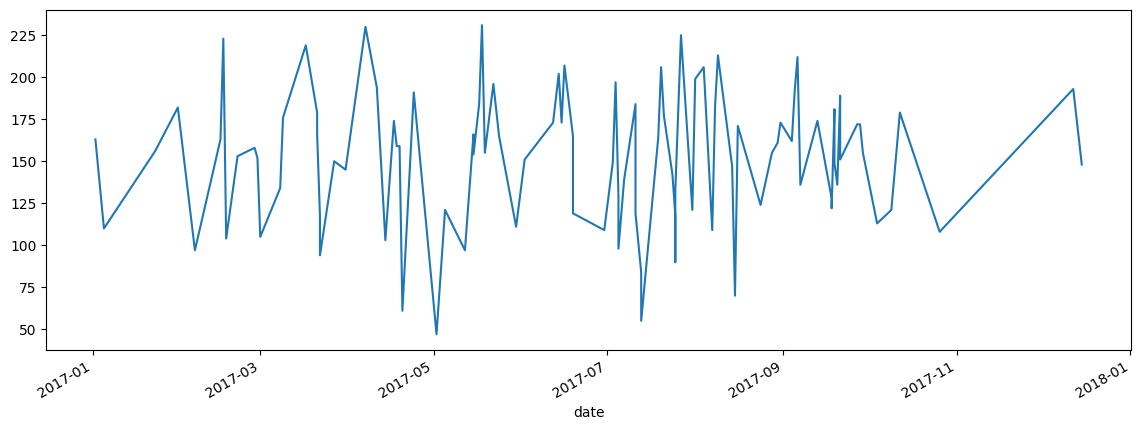

In [60]:
receipts_df['quantity'].plot(figsize=(14,5));